In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# import seaborn as sns
# import csv

### CSV

In [2]:
contests = pd.read_csv('data/Contests.csv')
# print(contests.head())

In [3]:
timeDF = pd.read_csv('data/WPI/2017-09.csv', header=None)
timeDF.columns = ['ContestId', 'MinutesRemaining', 'Entries']
targetIDs = timeDF.ContestId.unique()[:]

### Limiter

In [4]:
targetIDs = targetIDs[:5]

### Help Functions

In [5]:
def contestThreshold(id):
    aContest = getContestData(id)
    return float(aContest.TopPrize/aContest.EntryFeeAmount)

In [10]:
def getContestData(id):
    return contests.loc[contests['ContestId'] == id]

In [26]:
def getLabel(id):
    contestName =  getContestData(id)['ContestName'].values[0]
    print(contestName)
    return contestName

In [8]:
def totalTime():
    return timeDF['MinutesRemaining'].min(), timeDF['MinutesRemaining'].max()

### First Graphs

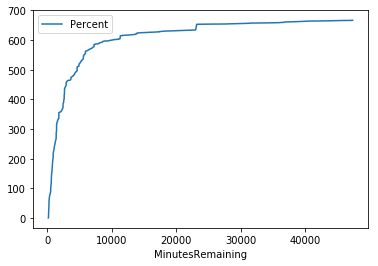

In [11]:
for id in targetIDs[:1]:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'].cumsum())
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    contestTimeDF.plot(x='MinutesRemaining', y='Percent', kind='line')


### Combining Graphs

##### (And fixing Axis)

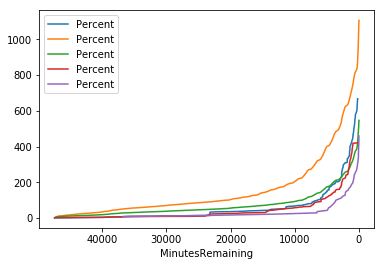

In [20]:
fig, ax = plt.subplots()
ax.invert_xaxis()

for id in targetIDs:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'][::-1].cumsum()[::-1])
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    
    contestTimeDF.groupby('ContestId').plot(ax = ax, x='MinutesRemaining', y='Percent', kind='line')


### Adding Threshold Bar

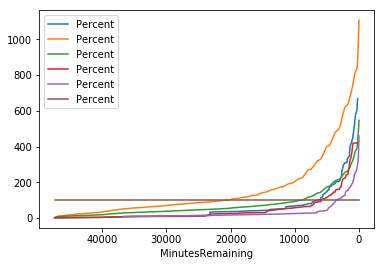

In [13]:
fig, ax = plt.subplots()
ax.invert_xaxis()

for id in targetIDs:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'][::-1].cumsum()[::-1])
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    
    contestTimeDF.groupby('ContestId').plot(ax = ax, x='MinutesRemaining', y='Percent', kind='line')

start, end = totalTime()
d = {'Percent': [100, 100], 'MinutesRemaining': [start, end]}
thresholdLine = pd.DataFrame(data=d)
thresholdLine.plot(ax=ax, x='MinutesRemaining', y='Percent')

### Labeling Data

NFL $1.5M Wildcat [$250K to 1st]
NFL $2M Play-Action [$200K to 1st]
NFL $5.55M Fantasy Football Millionaire [$1M to 1st]
NFL $400K Luxury Box [$100K to 1st]
NFL $70K Game Changer [2 Entry Max]


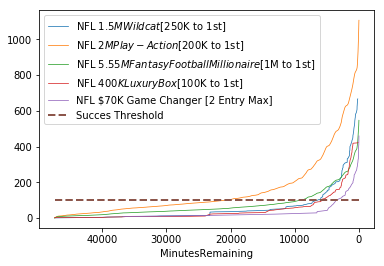

In [30]:
fig, ax = plt.subplots()
ax.invert_xaxis()

for id in targetIDs:
    contestTimeDF = timeDF.loc[timeDF['ContestId']==id] 
    threshold = contestThreshold(id)

    #Cumulitive sum of entries
    contestTimeDF = contestTimeDF.assign(TotalEntries = contestTimeDF['Entries'][::-1].cumsum()[::-1])
    #Percent of goal
    contestTimeDF = contestTimeDF.assign(Percent = lambda x: 100*(contestTimeDF.TotalEntries)/threshold)
    
    contestTimeDF.groupby('ContestId').plot(ax = ax, x='MinutesRemaining', y='Percent', kind='line', label=getLabel(id), lw=.75)

start, end = totalTime()
d = {'Percent': [100, 100], 'MinutesRemaining': [start, end]}
thresholdLine = pd.DataFrame(data=d)

thresholdLine.plot(ax=ax, x='MinutesRemaining', y='Percent', label='Succes Threshold', lw=2, linestyle="dashed")

# ax.legend(["AAA", "BBB"]);